# B 站搜索数据分析项目流程演示

设置搜索关键词等参数，其余代码块按需运行查看即可。

In [17]:
# -------------设置搜索参数-----------------
keyword = "经济" # 搜索关键词 
pages = 30 # 搜索页数
page_size = 30 # 每页结果数量(默认30)

## 数据获取

### bili_search_scraper.py

`bili_search_scraper.py` 爬取数据代码，输出初步清理后的 csv 格式表格。
一定要有 `cookie.txt`，否则无法运行脚本，会报错！获取方法详细见 `README.md`。

In [18]:
import bili_search_scraper as bs

In [19]:
out = f"{keyword}_搜索.csv" # 输出的文件名(建议默认)

In [20]:
with open("cookie.txt", "r", encoding="utf-8") as f:
    cookie = f.read().strip()

df = bs.crawl_bilibili_search(
    keyword=keyword,
    pages=pages,
    page_size=page_size,
    cookie=cookie
)

df.to_csv(out, index=False, encoding="utf_8_sig")
print(f"爬取成功！搜索结果已保存到 {out}")

爬取成功！搜索结果已保存到 经济_搜索.csv


## 探索性数据分析（EDA）

### bilibili_search_top10.py

In [21]:
import pandas as pd

df = pd.read_csv(f"{keyword}_搜索.csv", encoding="utf_8_sig")

利用 pandas 和字典统计出现次数最多的前十个词，并且利用 matplotlib 画出柱状图。

author（UP 主）出现次数 Top10
- 统计搜索结果中视频发布者出现频率
- 分析是否存在“头部 UP 主集中现象”

In [22]:
top10_author_df = (
    df['author']
    .value_counts()
    .head(10)
    .reset_index()
)

top10_author_df.columns = ['author', 'count']
top10_author_df

,author,count
0,花刀伤了自己,8
1,靳卫萍老师,6
2,鹿头军师,6
3,在下刀哥,6
4,小白投资笔记,5
5,CLS同学,5
6,老王来了精选视频,5
7,英语脱敏实验室,5
8,飞洋杂谈,4
9,共同富裕研习社,4


type_name（视频分区）出现次数 Top10

In [23]:
top10_type_df = (
    df['type_name']
    .value_counts()
    .head(10)
    .reset_index()
)

top10_type_df.columns = ['type_name', 'count']
top10_type_df

,type_name,count
0,财经商业,232
1,日常,134
2,人文历史,84
3,社科·法律·心理,63
4,校园学习,43
5,搞笑,11
6,汽车生活,9
7,电子竞技,9
8,娱乐杂谈,9
9,科学科普,7


tag（标签）出现次数 Top10

In [24]:
# 拆分标签 tag
tags = (
    df['tag']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
)

# 统计出现频率最高的10个标签
top10_tag_df = (
    tags
    .value_counts()
    .head(10)
    .reset_index()
)

top10_tag_df.columns = ['tag', 'count']
top10_tag_df


,tag,count
0,经济,312
1,财经,261
2,投资,129
3,中国,118
4,金融,109
5,社会,88
6,美国,64
7,青年用「财」图鉴,56
8,股票,56
9,商业,54


绘制柱状图

In [25]:
import platform
import matplotlib.pyplot as plt

解决 matplotlib 的中文乱码问题

In [26]:
# 1. 按系统给出一个“优先字体列表”
font_map = {
    'Darwin':  ['Arial Unicode MS', 'PingFang SC', 'Heiti SC'],      # macOS
    'Windows': ['SimHei', 'Microsoft YaHei', 'KaiTi'],               # Windows
    'Linux':   ['Noto Sans CJK SC', 'WenQuanYi Micro Hei']           # Linux
}

# 2. 找到当前系统
sys_name = platform.system()
candidates = font_map.get(sys_name, font_map['Linux'])

# 3. 依次试，直到找到一个系统里存在的
import matplotlib.font_manager as fm
avail = [f.name for f in fm.fontManager.ttflist]
for font in candidates:
    if font in avail:
        plt.rcParams['font.sans-serif'] = [font]
        break
else:                       # 一个都没找到，兜底用DejaVu+警告
    import warnings
    warnings.warn('未找到合适中文字体，图表中文可能显示为方块')

# 4. 解决负号乱码
plt.rcParams['axes.unicode_minus'] = False

UP 主 Top10 柱状图

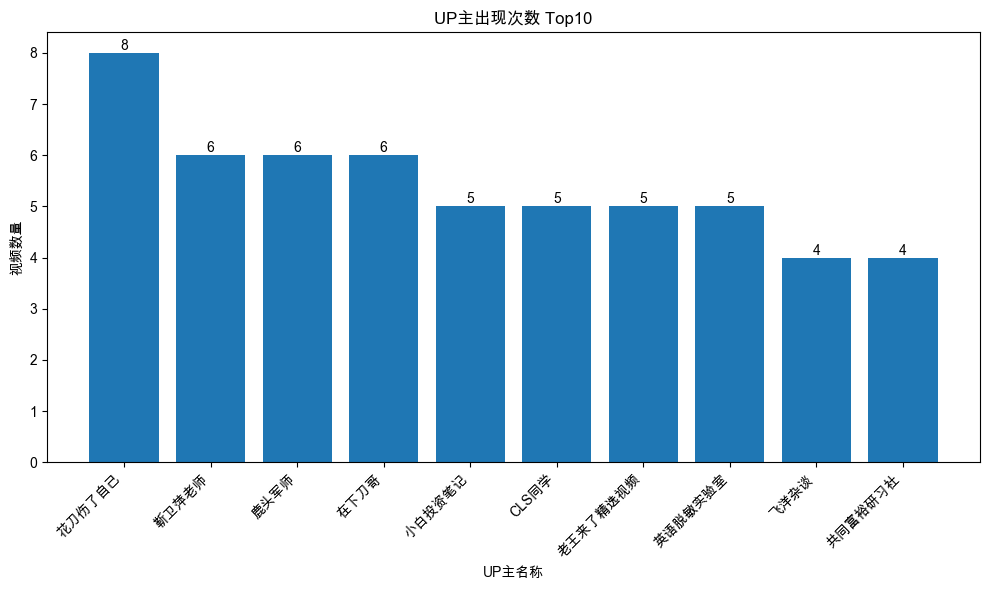

In [27]:
plt.figure(figsize=(10, 6))

bars = plt.bar(top10_author_df['author'], top10_author_df['count'])

plt.title('UP主出现次数 Top10')
plt.xlabel('UP主名称')
plt.ylabel('视频数量')

plt.xticks(rotation=45, ha='right')

# 在柱子上方标注数值
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x 位置：柱子中心
        height,                              # y 位置：柱子顶部
        f'{int(height)}',                    # 显示的文本
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


视频分区（type_name）出现次数 Top10

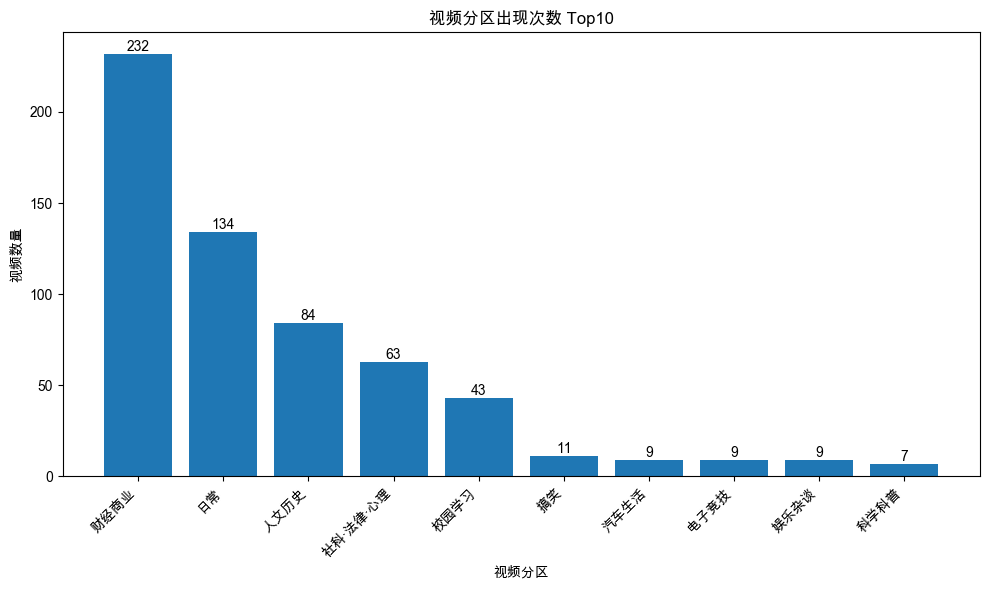

In [28]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top10_type_df['type_name'], top10_type_df['count'])

plt.title('视频分区出现次数 Top10')
plt.xlabel('视频分区')
plt.ylabel('视频数量')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


标签（tag）出现次数 Top10

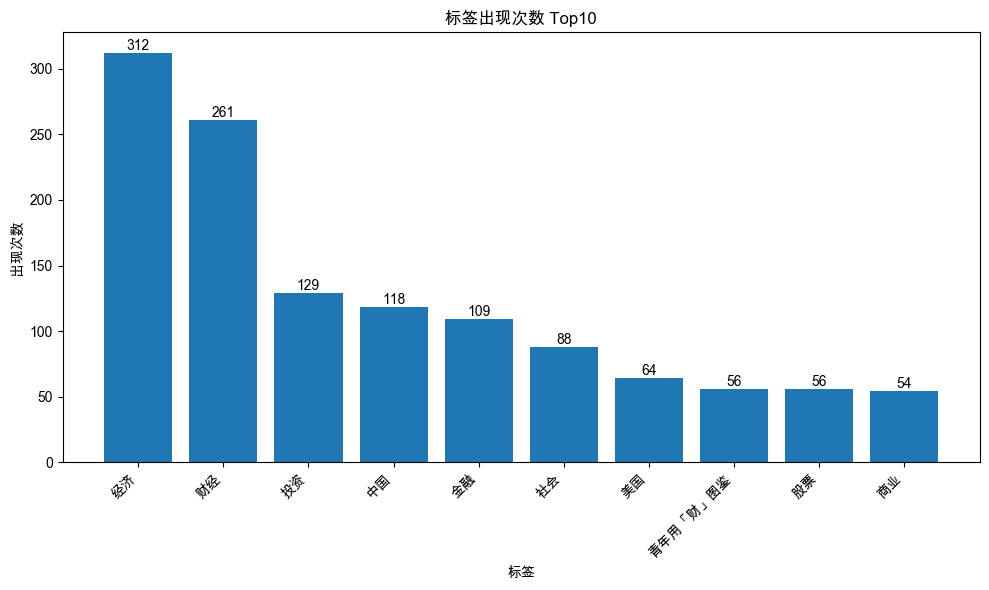

In [29]:
plt.figure(figsize=(10, 6))
bars = plt.bar(top10_tag_df['tag'], top10_tag_df['count'])

plt.title('标签出现次数 Top10')
plt.xlabel('标签')
plt.ylabel('出现次数')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()
